In [15]:
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV  #(cross_val_score ) is a function
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import   train_test_split,StratifiedKFold,cross_val_score
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import *


In [16]:
# Change the current working directory to "D:\Datasets"
os.chdir(r"D:\Datasets")

# Read the "Kyphosis.csv" file into a DataFrame named "kyp"
kyp = pd.read_csv("Kyphosis.csv")
kyp

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [28]:
# Encode the categorical variable 'Kyphosis' using LabelEncoder
le = LabelEncoder()
kyp['Kyphosis'] = le.fit_transform(kyp['Kyphosis'])

# Extract the target variable "y" (Kyphosis) from the DataFrame
y = kyp['Kyphosis']

# Extract the feature variables "x" (all columns except 'Kyphosis') from the DataFrame
x = kyp.drop('Kyphosis', axis=1)

# Split the data into training and testing sets using train_test_split()
# with a test size of 30% and stratified sampling based on the target variable (y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=24)

# Create a Logistic Regression model
lr = LogisticRegression(penalty = None)

# Train the model on the training data
lr.fit(x_train,y_train)

# Predict probabilities for the test data
y_pred_proba = lr.predict_proba(x_test)


# Plot

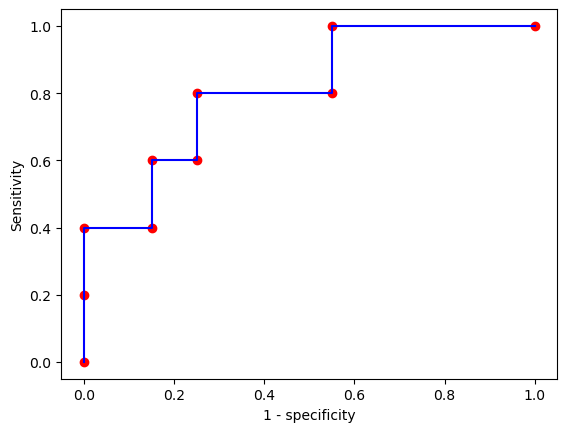

In [26]:
# Calculate the ROC curve and area under the curve
fpr, tpr, tres = roc_curve(y_test,y_pred_proba[:,1])
plt.scatter(fpr,tpr,c = 'red')
plt.plot(fpr,tpr,c='blue')
plt.xlabel("1 - specificity")
plt.ylabel("Sensitivity")
plt.show()

In [34]:
# Calculate the area under the curve
print('Area under the curve: ',roc_auc_score(y_test,y_pred_proba[:,1]))

# Calculate the log loss
print('Log Loss Value',log_loss(y_test, y_pred_proba[:,1]))

# Perform cross-validation for the model
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
print('Area under the curve (cross-validation): ',roc_auc_score(y, lr.predict(x), multi_class='ovr', average='macro', labels=le.classes_))

# Calculate the log loss for cross-validation
print('Log Loss Value (cross-validation)',log_loss(y, lr.predict(x), normalize=True))

# Calculate the mean of the cross-validation scores
results = cross_val_score(lr,x,y,cv=kfold,scoring='roc_auc')
print('roc_auc: ',results.mean())

results = cross_val_score(lr,x,y,cv=kfold,scoring='neg_log_loss')
print('neg_log_loss: ',results.mean())


Area under the curve:  0.81
Log Loss Value 0.4614046499229198
Area under the curve (cross-validation):  0.6806066176470589
Log Loss Value (cross-validation) 7.119734002788573
roc_auc:  0.878525641025641
neg_log_loss:  -0.436546346292387


# GridSearchCV

In [23]:
# Perform grid search for hyperparameter tuning
warnings.simplefilter('ignore')

params= {'penalty':['l2',None],'C':np.linspace(0.001,10,20),
        'solver':['lbfgs','newton-cg','newton-cholesky','sag']}

lr= LogisticRegression()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(lr,param_grid=params,cv =kfold,scoring='neg_log_loss')
gcv.fit(x,y)

print(gcv.best_params_)
print(gcv.best_score_)


{'C': 1.0535263157894736, 'penalty': 'l2', 'solver': 'sag'}
-0.4130989594007938
